<a href="https://colab.research.google.com/github/AdamClarkStandke/GenerativeDeepLearning/blob/main/StableVideoDiffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q -U diffusers transformers accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.7/279.7 kB 27.3 MB/s eta 0:00:00


In [12]:
import torch
from diffusers import StableVideoDiffusionPipeline
from diffusers.utils import load_image, export_to_video
import inspect
from IPython.display import HTML
from base64 import b64encode
import os

In [4]:
pipe = StableVideoDiffusionPipeline.from_pretrained("stabilityai/stable-video-diffusion-img2vid-xt", torch_dtype=torch.float16, variant="fp16")

model_index.json:   0%|          | 0.00/496 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

image_encoder/config.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/196M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/984 [00:00<?, ?B/s]

Fetching 9 files:   0%|          | 0/9 [00:00<?, ?it/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/3.05G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [6]:
pipe.enable_model_cpu_offload()

In [7]:
# load the conditioning image
image = load_image("https://i.imgur.com/xR6Jl5u.jpg")

In [8]:
image = image.resize((1024, 576))

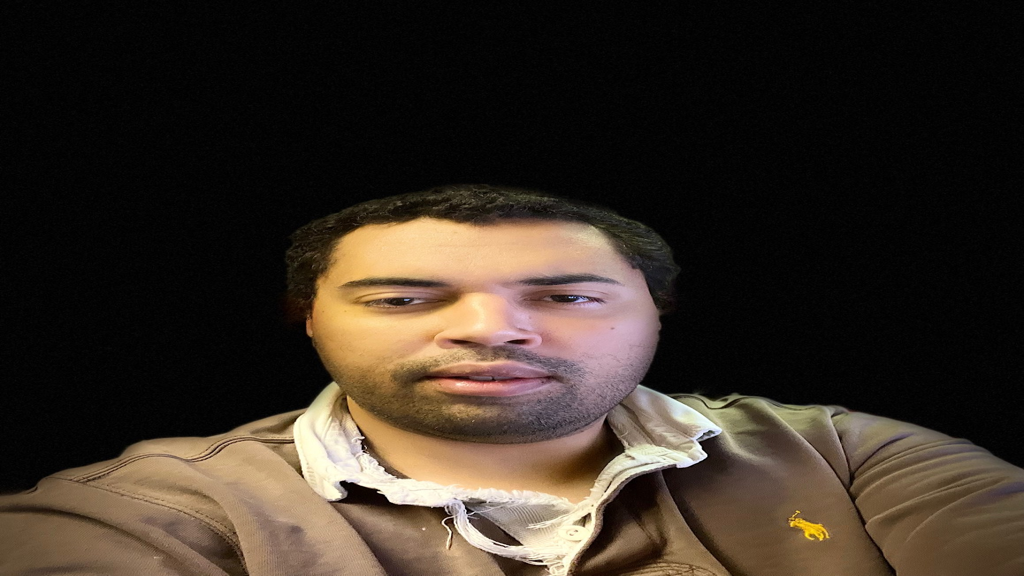

In [13]:
image

In [9]:
# turn image into 4 second video
generator = torch.manual_seed(42)
frames = pipe(image, decode_chunk_size=8, generator=generator).frames[0]
export_to_video(frames, "me.mp4", fps=7)

  0%|          | 0/25 [00:00<?, ?it/s]

'me.mp4'

In [16]:
# display video
save_path="/content/me.mp4"
compressed_path = "/content/me_compressed.mp4"
os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=1024 height=576 controls loop>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)